# Predicting heart disease using machine learning
The notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has a heart disease based on their medical attributes.
We are going to follow the following approach 
1. Problem definition
2. Data
3. Evaluation
4. Features of the data
5. Modelling
6. Experimentation (most crucial)

# 1. Problem Definition
In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

# 2.Data
The original data came from the cleavland data from the UCI Machine Learning Repository.
https://archive.ics.uci.edu/dataset/45/heart+disease
> There is also a version of it available on Kaggle.
https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

# 3.Evaluation 
If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept we will pursue the project.

# 4.Features
**Create data dictionary**
1.   age       
2.   sex      
3.   cp        
4.  trestbps  
5.  chol    
6.  fbs       
7.  restecg   
8.  thalach   
9.  exang    
10. oldpeak   
11. slope     
12. ca       
13. thal      
14. numsable defect

# Preparing the tools
We are going to use pandas,Matplotlib and Numpy for data analysis and manipulation.

In [3]:
# Import all the tools we need 

# Regular EDA (Exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear inside the notebook 
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import  RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,f1_score,recall_score
##

In [4]:
df = pd.read_csv("Data/heart-disease.csv")
df.shape 

(303, 14)

In [5]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Data exploration or EDA (Exploratory data analysis)

The goal here is to find out more about the data and the subject and become a subject matter export on the dataset you're working with.
1. Problem Definition
2. Kinds of data we have
3. Missing data
4. Where are the outliers and why you should care about them
5. How can you add,remove or change features to get more out of your data?

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df['target'].value_counts()  # 1= yes and 0 = no

target
1    165
0    138
Name: count, dtype: int64

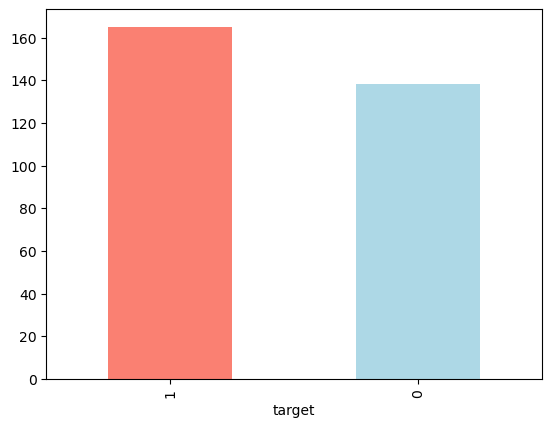

In [8]:
df['target'].value_counts().plot(kind='bar',color=['salmon','lightblue']);

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
df.isna().sum() #YAY no missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to sex 

In [12]:
df['sex'].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

#### Make different plots of different columns with the target column

In [13]:
# Compare Target column with sex column
pd.crosstab(df.target,df.sex) #this shows that based on our data females are more liklely to get heart diseases 

sex,0,1
target,,
0,24,114
1,72,93


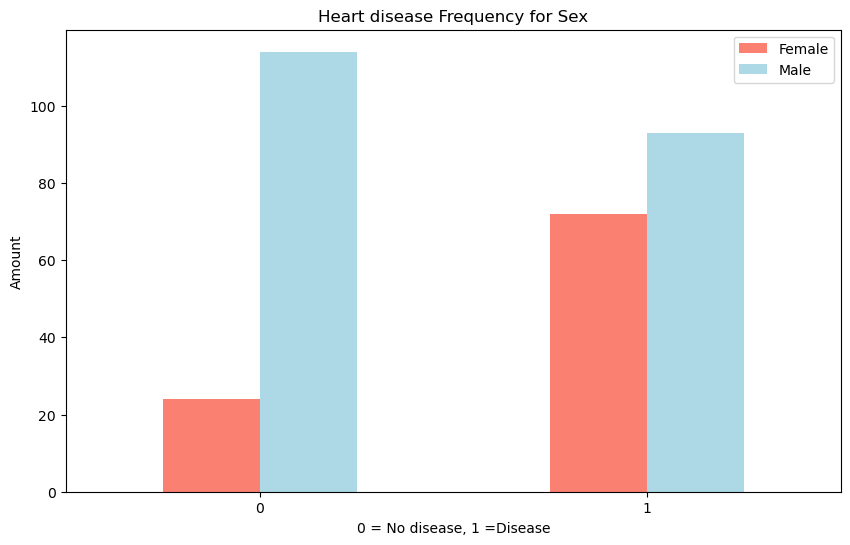

In [14]:
# Create a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind = 'bar',
                                  figsize = (10,6),
                                  color = ['salmon','lightblue']);
plt.title("Heart disease Frequency for Sex")
plt.xlabel("0 = No disease, 1 =Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

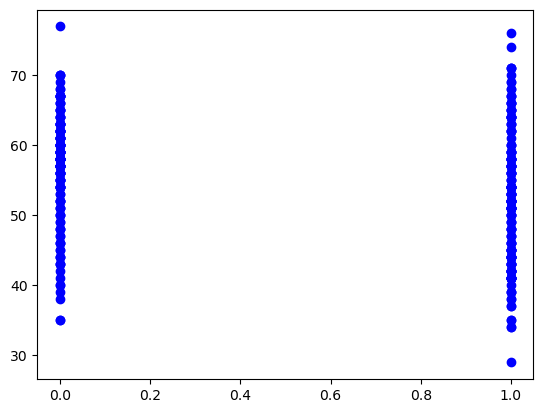

In [15]:
plt.scatter( df.target,df.age, color='blue', marker='o', label='Data Points')

In [16]:
# Now comparing independent variables
# Age,thalach,target
df["thalach"].value_counts()  ## Thalach is maximum heart rate achieved

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

## Age VS Max Heart Rate for Heart Disease

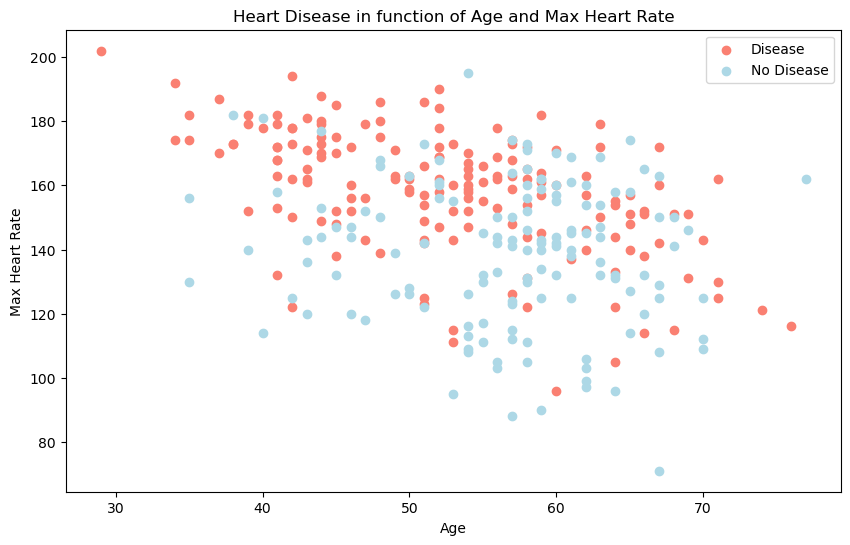

In [17]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           color='salmon')
# Scatter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           color='lightblue');
# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"]);

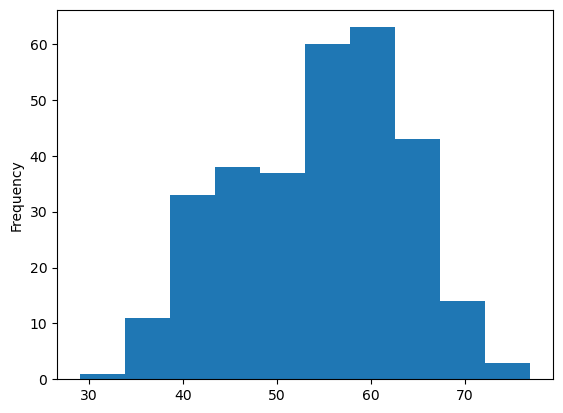

In [18]:
# Check distribution of age  do it for other columns so that you can search for outliers
df.age.plot.hist();

### Heart Disease Frequency per Chest Pain Type
cp - Chest pain type
* 0: Typical agina:chest pain related decrease blood supply to the heart
* 1: Atypical Angina:chest pain not related to heart
* 2: Non-Anginal:Typically esophageal spasms (non heart related)
* 3: Asymptomatic:chest pain not showing signs of disease

In [19]:
pd.crosstab(df.cp,df.target) # mainly 1 and 2 

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


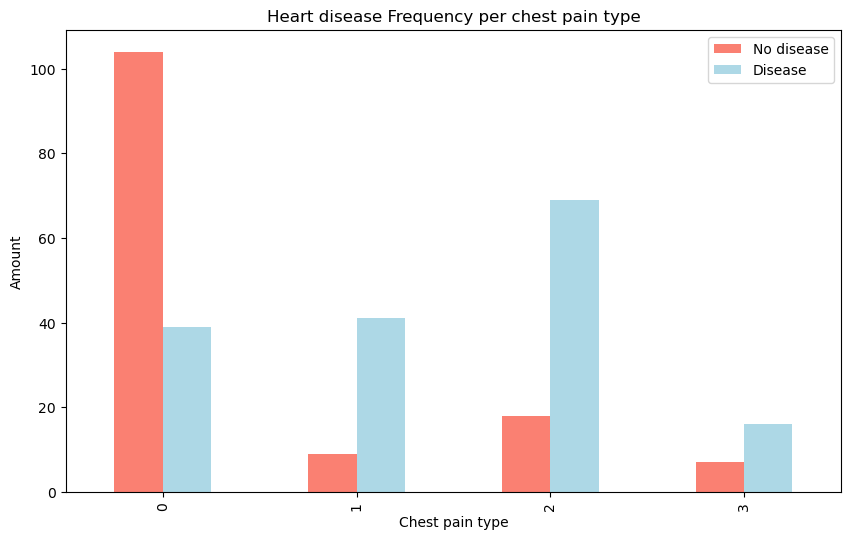

In [20]:
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                 figsize=(10,6),
                                 color=['salmon','lightblue'])

plt.title("Heart disease Frequency per chest pain type")
plt.xlabel("Chest pain type")
plt.ylabel("Amount")
plt.legend(["No disease","Disease"]);

In [21]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


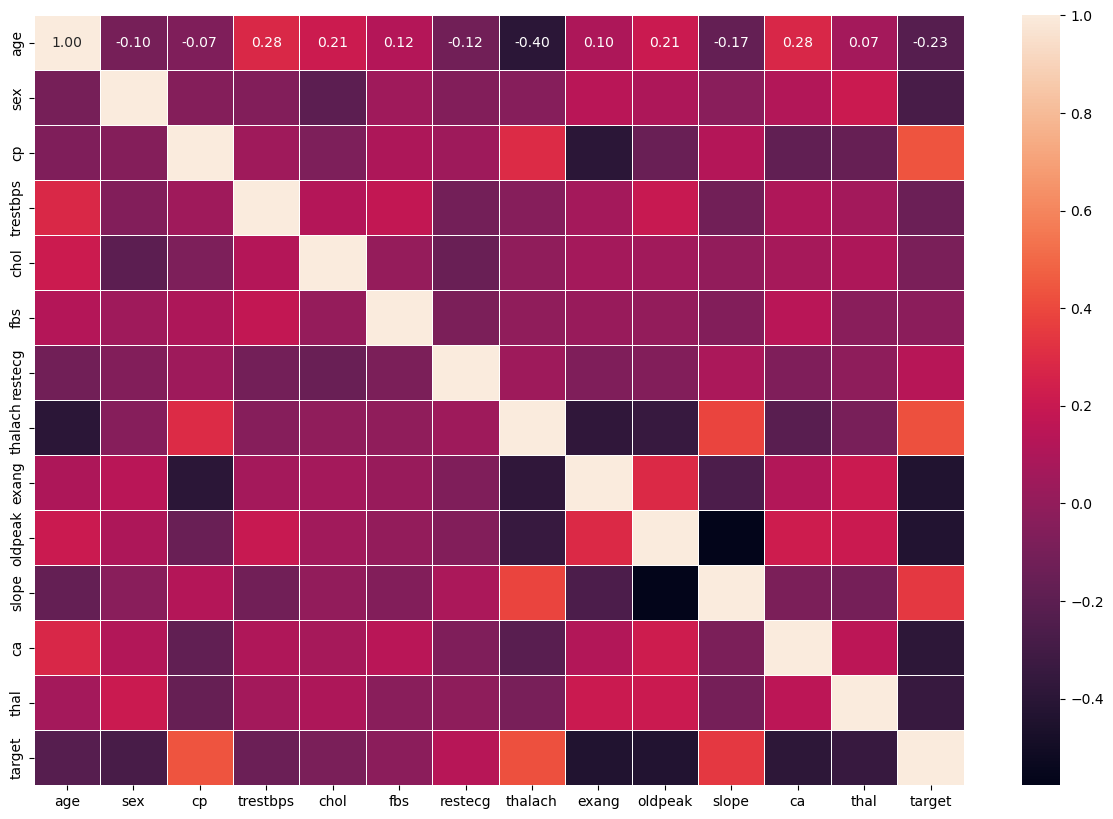

In [22]:
# Lets make it more visual
corr_matrix = df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,fmt='.2f',
              linewidths=0.5);

## Modelling

In [23]:
#Splitting into X and Y
x = df.drop("target",axis=1)
y = df["target"]

In [24]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [25]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [26]:
#Split into Train_test
np.random.seed(42)

#Split into train and test set
x_train,x_test,y_train,y_test = train_test_split(x,
                                                y,
                                                test_size=0.2)
y_train,len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

# Experimentation

In [27]:
# We have got a classification problem so we'll use our estimator map to find which estimator we need 


# Despite it's name logistic regression is more used for classification rather than regression
# WE'LL USE 3 DIFFERENT MODELS
# LOGISTIC REGRESSION
# K-NEAREST NEIGHBOUR CLASSIFIER
# RANDOM FOREST CLASSIFIER

In [28]:
 from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
models ={"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()
        }
def fit_model_score(models,x_train,x_test,y_train,y_test):
    """
    Fits different models and give the scores that have been produced
    X_test: Testing data
    X_train:Training data
    Y_train:training labels
    Y_test:Testing labels
    """
    np.random.seed(42)
    model_scores={}
    for name,model in models.items():
        model.fit(x_train,y_train)
        model_scores[name]= model.score(x_test,y_test)
    return model_scores

In [29]:
model_scores = fit_model_score(models=models,
                              x_test=x_test,
                              x_train=x_train,
                              y_test=y_test,
                              y_train=y_train)
model_scores

C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

#  Model Comaprison

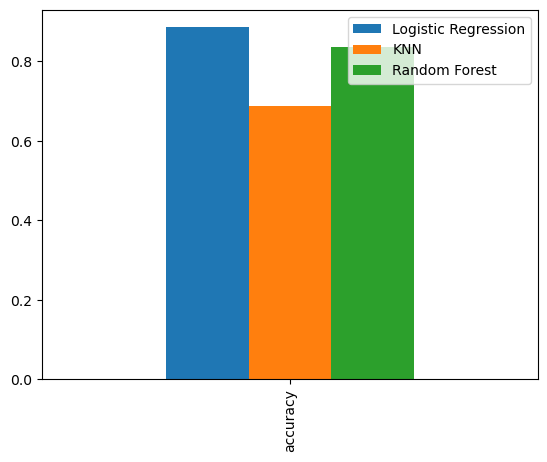

In [30]:

model_compare = pd.DataFrame(model_scores,index=["accuracy"])
model_compare.plot.bar();

## Classification 
We've got our baseline model now we will tune this with hyperparameters
Look at the following :
* Hyperparameter Tuning
* Feature Importance
* Confusion Matrix
* Cross Validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve Area under the curve (AUC) 

## Hyperparameter Tuning 

## We will not tune knn its not worth it as you can see from the graph:


 We'll hypertune 
 Logistic Regression
 RandomizedForest #using Randomized SearchCV 

In [32]:
# Create a Hyperparameter grid for logistic Regression 
log_reg_grid = {"C": np.logspace(-4,4,20),
               "solver": ["liblinear"]}

#Create a hyperparameter gtid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10,1000,50),
           "max_depth": [None,3,5,10],
           "min_samples_split":np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2)
          }

In [ ]:
# Hyperparameter tuning using RandomSearchCV


## Hyperparameter Tuning with GridSearchCV
We'll hypertune our LogisticRegression model as it gives the best scores so far,
we'll try and improve them using GridSearchCV....

In [33]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4,4,30),
               "solver":["liblinear"]}

# Setupgrid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(x_train,y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [37]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [38]:
gs_log_reg.score(x_test,y_test) * 100

88.52459016393442

# Evaluating our Model

* Roc curve
* Conusion Matrix
* Classification report
* Precision
* F1 Score

.... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model , first  we need to make predictions

In [39]:
y_preds = gs_log_reg.predict(x_test)

In [40]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [41]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

## ROC Curve -:
The ROC curve is the plot of the true positive rate (TPR) against the false positive rate (FPR) at each threshold setting.
<br>
True Positive = model predicts 1 when truth is 1
<br>
False Positive = model predicts 1 when truth is 0
<br>
True negative = model predicts 0 when truth is 0
<br>
False negative = model predicts 0 when truth is 1

In [51]:
# Plot ROC Curve and calculate AUC metric
from sklearn.metrics import RocCurveDisplay
from sklearn import metrics

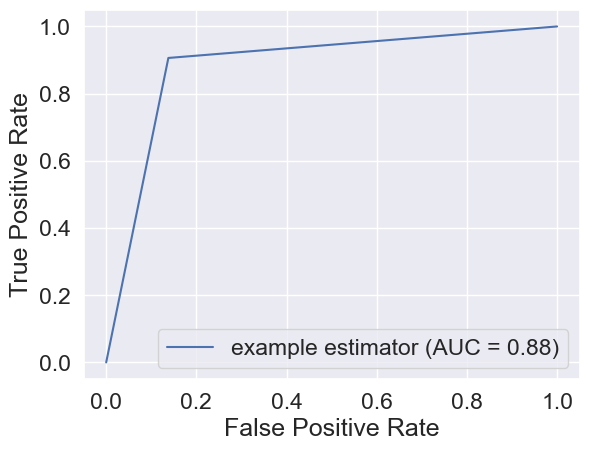

In [52]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_preds)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
plt.show()

In [48]:
# Confusion Matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


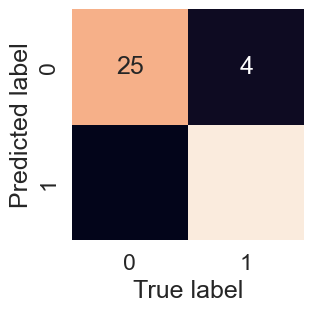

In [49]:
import seaborn as sns
sns.set(font_scale = 1.5)
def plot_conf_matrix(y_test,y_preds):
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

plot_conf_matrix(y_test,y_preds)

In [54]:
print(classification_report(y_test,y_preds)) # This is only done on one set of data
# we should use cross validation for better evaluation

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross validation

We're going to calculate precision,recall and f1-score of our model using cross validation and to do so we'll be using 'cross_val_score'

In [55]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [56]:
clf = LogisticRegression(C=0.20433597178569418,
                        solver="liblinear")

In [58]:
from sklearn.model_selection import cross_val_score
cv_acc=cross_val_score(clf,
               x,
               y,
               cv=5,
               scoring="accuracy")
cv_acc=np.mean(cv_acc)
cv_acc

0.8446994535519124

In [62]:
cv_precision=cross_val_score(clf,
               x,
               y,
               cv=5,
               scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8207936507936507

In [63]:
cv_recall=cross_val_score(clf,
               x,
               y,
               cv=5,
               scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

0.9212121212121213

In [64]:
cv_f1=cross_val_score(clf,
               x,
               y,
               cv=5,
               scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

0.8673007976269721

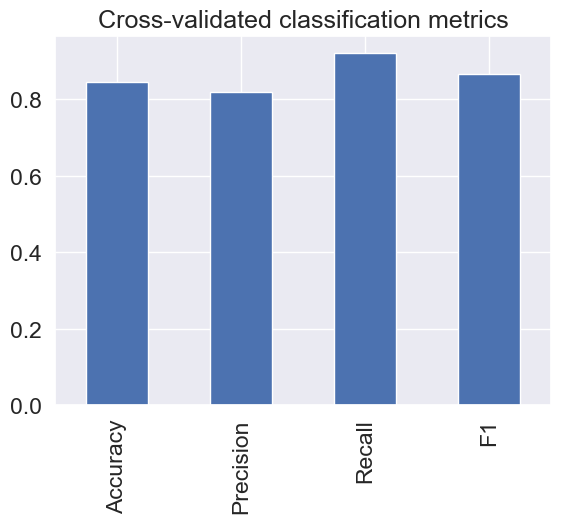

In [74]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                           "Precision":cv_precision,
                           "Recall":cv_recall,
                           "F1":cv_f1},
                           index=[0]
                          )
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                   legend = False);

### Feature Importance
"Which features contributed most to the outcome of the model"

Finding feature importance is different for each machine learning model.

The easiest way to determine the significance of a feature in logistic regression is to look at the size of the coefficients (β). Features with higher absolute coefficient values are deemed more significant.

But let's find the feature importance of our LogisticRegression model...

In [79]:
gs_log_reg.best_params_


{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [81]:
clf=LogisticRegression(C = 0.20433597178569418,
                      solver="liblinear")
clf.fit(x_test,y_test)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [76]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [83]:
clf.coef_ # here we can see which feature has more coefficient value hence more important

array([[ 0.0487551 , -0.29075949,  0.72901744, -0.05269429, -0.00853869,
        -0.1694745 ,  0.27736564,  0.0526906 , -0.07968269, -0.20742362,
        -0.16721517, -0.47347452, -0.27148831]])

In [84]:
# Match the Features to their coefs
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.048755098554728225,
 'sex': -0.29075948973855076,
 'cp': 0.7290174385165903,
 'trestbps': -0.05269429471234642,
 'chol': -0.008538689969191228,
 'fbs': -0.16947449546315368,
 'restecg': 0.2773656376958134,
 'thalach': 0.05269059974979354,
 'exang': -0.07968268884471846,
 'oldpeak': -0.20742361607577312,
 'slope': -0.1672151718181001,
 'ca': -0.4734745233992178,
 'thal': -0.2714883127144326}

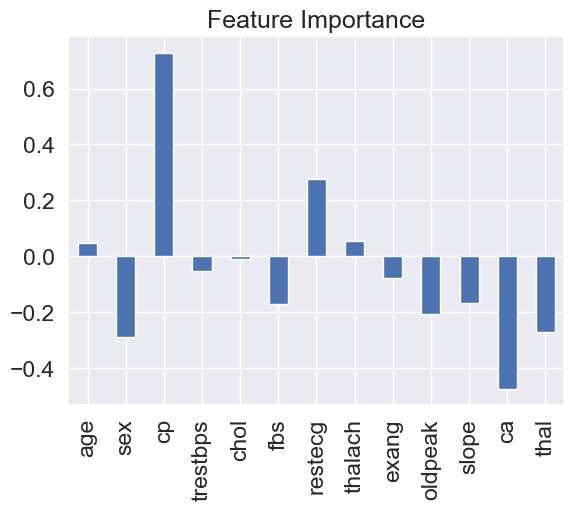

In [86]:
# Visualize Feature importance
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False);

### Experimentation
If you haven't hit your evaluation metric yet -:

* Collect more data?
* Could you try a better model? CatBoost or XGBoost
* Could you improve the current models?

And if your model is good enough how would you share it with others?

ASK QUESTIONS!!!!!

In [87]:
pip install catboost

   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB 660.6 kB/s eta 0:02:34
   ---------------------------------------- 0.3/101.7 MB 4.1 MB/s eta 0:00:25
   ---------------------------------------- 0.6/101.7 MB 5.1 MB/s eta 0:00:20
   ---------------------------------------- 0.8/101.7 MB 5.0 MB/s eta 0:00:21
   ---------------------------------------- 1.1/101.7 MB 5.2 MB/s eta 0:00:20
    --------------------------------------- 1.3/101.7 MB 4.8 MB/s eta 0:00:21
    --------------------------------------- 1.5/101.7 MB 4.9 MB/s eta 0:00:21
    --------------------------------------- 1.7/101.7 MB 4.8 MB/s eta 0:00:21
    --------------------------------------- 1.9/101.7 MB 4.6 MB/s eta 0:00:22
    --------------------------------------- 2.1/101.7 MB 4.5 MB/s eta 0:00:23
    --------------------------------------- 2.2/101.7 MB 4.4 MB/s eta 0:00:23
    --------------------------------------- 2.4/101.7 MB 4.5 MB/s eta